# Stage 1: Dataset Selection and Exploration

In [28]:
import pandas as pd

In [29]:
data = pd.read_csv("D:/SYIFA_KULIAH/MATKUL_SMT_4/MP_ML/UAS/restaurant_menu_optimization_data.csv")

In [30]:
# Deskripsi dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
None


In [31]:
print(data.describe())

            Price
count  1000.00000
mean     12.81801
std       7.41713
min       2.01000
25%       4.86750
50%      12.53500
75%      17.69000
max      29.84000


In [32]:
data.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [33]:
# Hapus kolom RestaurantID
data = data.drop('RestaurantID', axis=1)

In [34]:
#untuk melihat banyak dimensi data
print(data)

    MenuCategory               MenuItem  \
0      Beverages                   Soda   
1     Appetizers  Spinach Artichoke Dip   
2       Desserts    New York Cheesecake   
3    Main Course        Chicken Alfredo   
4    Main Course          Grilled Steak   
..           ...                    ...   
995    Beverages                   Soda   
996   Appetizers          Caprese Salad   
997  Main Course     Vegetable Stir-Fry   
998     Desserts               Tiramisu   
999    Beverages                   Soda   

                                           Ingredients  Price Profitability  
0                                     ['confidential']   2.55           Low  
1         ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']  11.12        Medium  
2             ['Chocolate', 'Butter', 'Sugar', 'Eggs']  18.66          High  
3    ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  29.55          High  
4    ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  17.73        Medium  
..             

In [35]:
# Check for missing values
print(data.isnull().sum())

MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


d:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


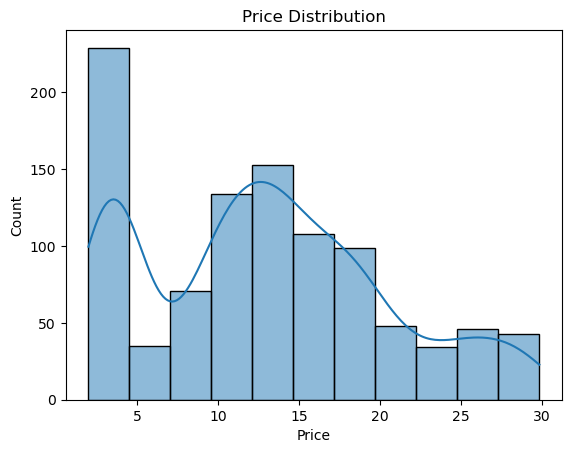

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize distribution of Price
sns.histplot(data['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

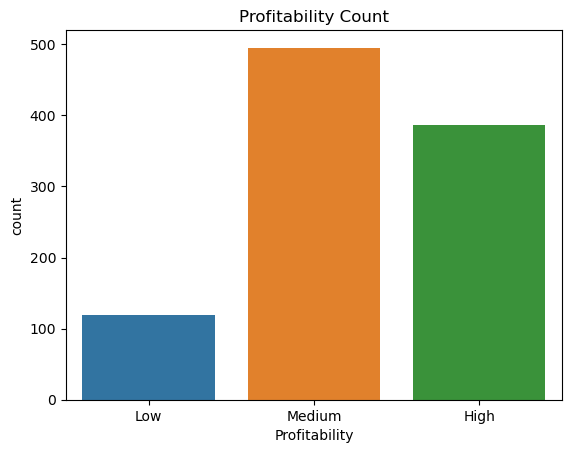

In [37]:
# Visualize count of Profitability
sns.countplot(x='Profitability', data=data)
plt.title('Profitability Count')
plt.show()

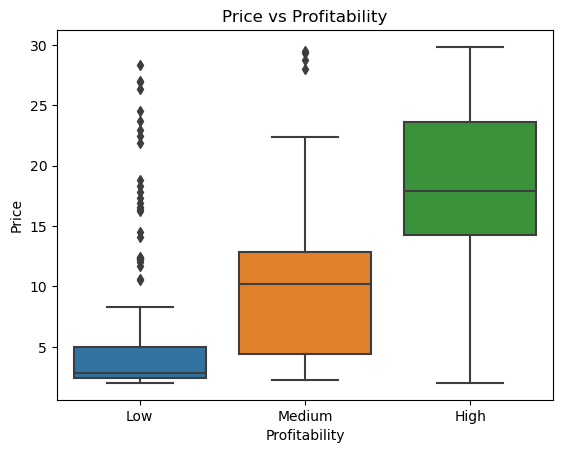

In [38]:
# Check the correlation between Price and Profitability
sns.boxplot(x='Profitability', y='Price', data=data)
plt.title('Price vs Profitability')
plt.show()

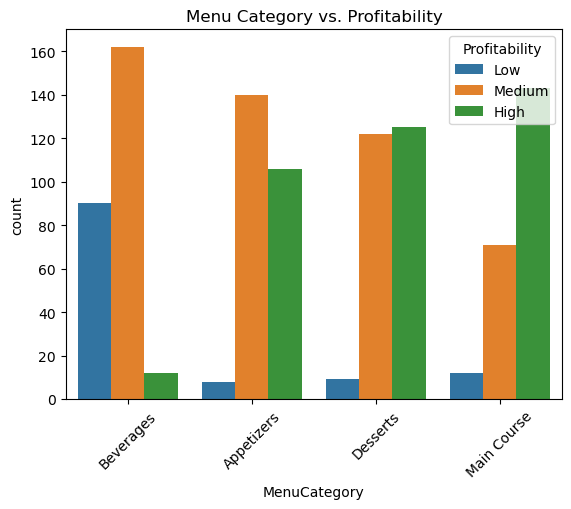

In [39]:
# Countplot of MenuCategory by Profitability
sns.countplot(x='MenuCategory', hue='Profitability', data=data)
plt.title('Menu Category vs. Profitability')
plt.xticks(rotation=45)
plt.show()

# Stage 2: Data Processing

In [40]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [41]:
# One-hot encoding for MenuCategory
data = pd.get_dummies(data, columns=['MenuCategory'])

In [42]:
# Label encoding for Profitability
le = LabelEncoder()
data['Profitability'] = le.fit_transform(data['Profitability'])

In [43]:
# Scaling the Price feature
scaler = StandardScaler()
data['Price'] = scaler.fit_transform(data[['Price']])

In [44]:
# Splitting the dataset into training and testing sets
X = data.drop(columns=['MenuItem', 'Ingredients', 'Profitability'])
y = data['Profitability']

# Stage 3: Model Training and Comparison

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [47]:
# Initialize models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [48]:
# Define hyperparameter grids
param_grid_lr = {'C': [0.1, 1, 10]}
param_grid_dt = {'max_depth': [3, 5, 7]}
param_grid_rf = {'n_estimators': [10, 50, 100]}

In [49]:
# Hyperparameter tuning using GridSearchCV
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

In [50]:
# Train and evaluate models
models = {'Logistic Regression': grid_lr, 'Decision Tree': grid_dt, 'Random Forest': grid_rf}
metrics = {}
best_model = None
best_f1 = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics[name] = [acc, prec, recall, f1]

    # Save the best model based on F1 Score
    if f1 > best_f1:
        best_f1 = f1
        best_model = model

    # Cross-validation for robustness
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name} - Cross-Validation Accuracy: {cv_scores.mean()}')

d:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression - Cross-Validation Accuracy: 0.834
Decision Tree - Cross-Validation Accuracy: 0.9129999999999999
Random Forest - Cross-Validation Accuracy: 0.882


In [55]:
# Print metrics
metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(metrics_df)

           Logistic Regression  Decision Tree  Random Forest
Accuracy              0.820000       0.900000       0.850000
Precision             0.720410       0.895722       0.843666
Recall                0.820000       0.900000       0.850000
F1 Score              0.766013       0.893336       0.843703


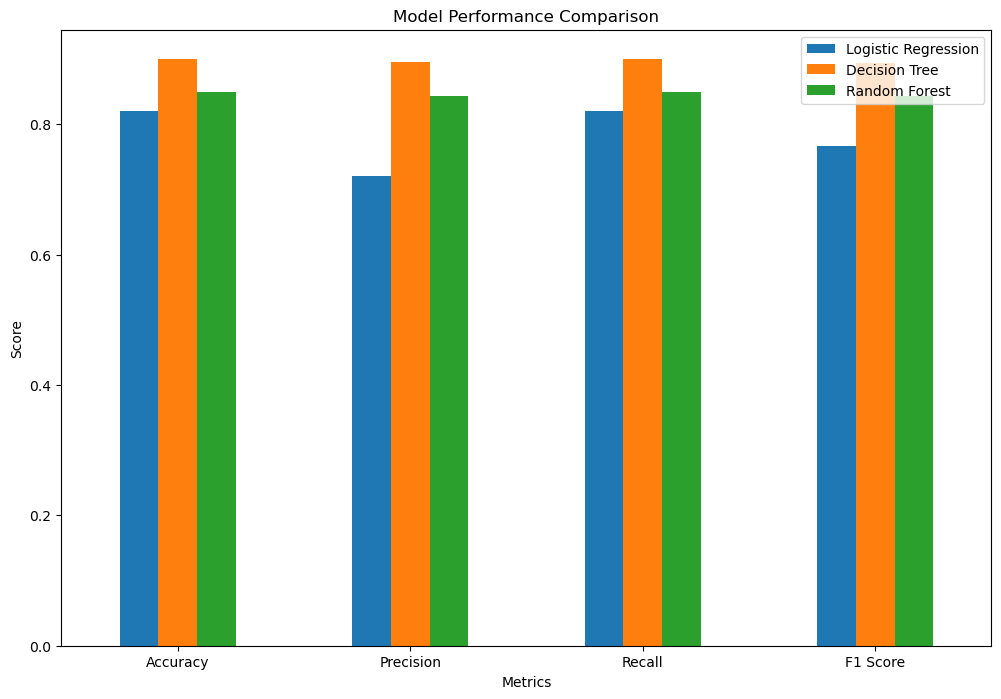

In [52]:
# Visualize performance
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

# Stage 6: Evaluation

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [57]:
# Menggunakan model terbaik dari tahap sebelumnya
best_model = grid_dt

In [58]:
# Prediksi pada data uji
y_pred = best_model.predict(X_test)

In [59]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[73  2  2]
 [ 5 13  7]
 [ 3  1 94]]


In [62]:
# Periksa jumlah kelas unik dalam y_test
print("Unique classes in y_test:", y_test.unique())

Unique classes in y_test: [1 2 0]


In [63]:
# Sesuaikan target_names dengan jumlah kelas unik dalam y_test
target_names = ['Low', 'Medium', 'High']

In [64]:
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=target_names)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

         Low       0.90      0.95      0.92        77
      Medium       0.81      0.52      0.63        25
        High       0.91      0.96      0.94        98

    accuracy                           0.90       200
   macro avg       0.88      0.81      0.83       200
weighted avg       0.90      0.90      0.89       200



In [65]:
# ROC Curve dan AUC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

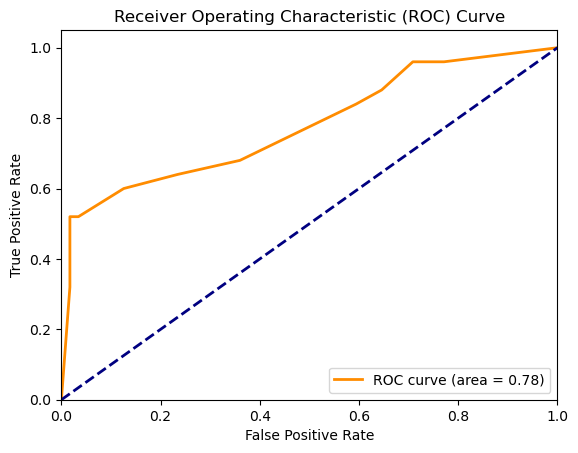

In [68]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()